# <ins>Movie Production Recommendations for Microsoft Studios</ins>
Brand new Microsoft Studios requires a game plan for their initial run of movies. We examined what genres garner the greatest Return on Investment, evaluated the most and least popular genres, and looked at when movies were being released and have determined that Microsoft is best served by releasing Thrillers or Documentaries in late spring or at the very end of the year.

## Data Understanding
The data sets of IMDb, Box Office Mojo and the Movie Database combined to provide us with over 1163 data points. We were able to use this data to analyze movie success rates based on genre, movie studio, budget and box office information. 

In [413]:
# Importing pandas to help work with the data.
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
import matplotlib.patches as mpatches
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.options.display.float_format = '{:.5f}'.format # Supresses scientific notation.

movie_gross_df = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
imdb_title_basics_df = pd.read_csv('zippedData/imdb.title.basics.csv.gz') 
imdb_title_ratings_df = pd.read_csv('zippedData/imdb.title.ratings.csv.gz') 
tmdb_movies_df = pd.read_csv('zippedData/tmdb.movies.csv.gz')
tn_movie_budgets_df = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

The following exploratory actions were taken on all files in the report.

In [337]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1163 entries, 0 to 1162
Data columns (total 52 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1163 non-null   int64  
 1   Unnamed: 0_x       1163 non-null   int64  
 2   tconst             1163 non-null   object 
 3   primary_title      1163 non-null   object 
 4   original_title     1163 non-null   object 
 5   start_year         1163 non-null   int64  
 6   runtime_minutes    1163 non-null   float64
 7   genres             1163 non-null   object 
 8   Action             1163 non-null   bool   
 9   Crime              1163 non-null   bool   
 10  Drama              1163 non-null   bool   
 11  Biography          1163 non-null   bool   
 12  Comedy             1163 non-null   bool   
 13  Fantasy            1163 non-null   bool   
 14  Horror             1163 non-null   bool   
 15  Thriller           1163 non-null   bool   
 16  Adventure          1163 

In [338]:
tmdb_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [339]:
tmdb_movies_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.53300,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.70000,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.73400,2010-03-26,How to Train Your Dragon,7.70000,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.51500,2010-05-07,Iron Man 2,6.80000,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.00500,1995-11-22,Toy Story,7.90000,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.92000,2010-07-16,Inception,8.30000,22186


## Movie Gross
This data set contains information on movies, their relevant movie studios and domestic and foreign gross for movies released from 2010-2018.

In [340]:
movie_gross_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.00000,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.00000,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.00000,664300000,2010
3,Inception,WB,292600000.00000,535700000,2010
4,Shrek Forever After,P/DW,238700000.00000,513900000,2010


In [341]:
movie_gross_df['year'].unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018])

In [342]:
movie_gross_df['studio'].value_counts()

IFC           166
Uni.          147
WB            140
Magn.         136
Fox           136
             ... 
Grindstone      1
Zee             1
FEF             1
SEG             1
FOAK            1
Name: studio, Length: 257, dtype: int64

In [343]:
# Plug in different studio values to see movie titles.
movie_gross_df.loc[movie_gross_df['studio'] == "LGF"]

,title,studio,domestic_gross,foreign_gross,year
26,The Expendables,LGF,103100000.00000,171400000,2010
51,Saw 3D,LGF,45700000.00000,90400000,2010
64,Killers,LGF,47100000.00000,51100000,2010
65,Kick-Ass,LGF,48100000.00000,48100000,2010
87,The Last Exorcism,LGF,41000000.00000,26700000,2010
...,...,...,...,...,...
3207,Hell Fest,LGF,11100000.00000,7100000,2018
3229,Kin,LGF,5700000.00000,4300000,2018
3231,Traffik,LGF,9200000.00000,336000,2018
3235,Condorito: La Pelicula,LGF,448000.00000,8000000,2018


In [344]:
#check for outliers in gross
movie_gross_df.sort_values('domestic_gross').head(10)

,title,studio,domestic_gross,foreign_gross,year
1476,Storage 24,Magn.,100.00000,NaN,2013
2321,The Chambermaid,FM,300.00000,NaN,2015
2756,News From Planet Mars,KL,300.00000,NaN,2016
2757,Satanic,Magn.,300.00000,NaN,2016
1018,Apartment 143,Magn.,400.00000,426000,2012
3078,2:22,Magn.,400.00000,NaN,2017
3077,Max & Leon,Distrib.,500.00000,NaN,2017
1126,Death of a Superhero,Trib.,600.00000,NaN,2012
2920,Amityville: The Awakening,W/Dim.,700.00000,7700000,2017
1475,Into the White,Magn.,700.00000,NaN,2013


In [345]:
reg_expression = '\([0-9]{4}\)' #looks for 4-digit numeric string between '(' and ')'

# found the below format online, returns all movies that meet the reg expression

titles_need_formatting = movie_gross_df[movie_gross_df['title'].str.count(reg_expression)>0]
titles_need_formatting

,title,studio,domestic_gross,foreign_gross,year
1,Alice in Wonderland (2010),BV,334200000.00000,691300000,2010
10,Clash of the Titans (2010),WB,163200000.00000,330000000,2010
55,A Nightmare on Elm Street (2010),WB (NL),63100000.00000,52600000,2010
85,Legion (2010),SGem,40200000.00000,27800000,2010
106,Death at a Funeral (2010),SGem,42700000.00000,6300000,2010
...,...,...,...,...,...
3326,The Little Mermaid (2018),Conglomerate,147000.00000,NaN,2018
3340,Revenge (2018),Neon,102000.00000,NaN,2018
3341,Unstoppable (2018),WGUSA,101000.00000,NaN,2018
3365,The Apparition (2018),MBox,28300.00000,NaN,2018


In [346]:
# finds all the re-releases

substring = 're-release'

movie_gross_df[movie_gross_df['title'].str.find(substring)>0]

,title,studio,domestic_gross,foreign_gross,year
1823,The Conformist (2014 re-release),KL,58700.00000,NaN,2014
1833,Alphaville (2013 re-release),Rialto,47700.00000,NaN,2014
2139,The Third Man (2015 re-release),Rialto,449000.00000,NaN,2015
2604,Only Yesterday (2016 re-release),GK,453000.00000,NaN,2016
3264,2001: A Space Odyssey (2018 re-release),WB,3200000.00000,NaN,2018
3289,Schindler's List (2018 re-release),Uni.,833000.00000,NaN,2018
3296,The Sound of Music (2018 re-release),Fathom,616000.00000,NaN,2018
3383,Edward II (2018 re-release),FM,4800.00000,NaN,2018


## IMDb Title Basics
Data set contains almost 150000 movie listings from 2010-2027 releases.

In [347]:
imdb_title_basics_df

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.00000,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00000,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.00000,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,nan,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.00000,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.00000,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,nan,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,nan,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.00000,NaN


In [348]:
imdb_title_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [349]:
# Null values located in original_title, runtime_minutes and genres.

In [350]:
imdb_title_basics_df['start_year'].unique()

array([2013, 2019, 2018, 2017, 2012, 2010, 2011, 2015, 2021, 2016, 2014,
       2020, 2022, 2023, 2024, 2026, 2025, 2115, 2027])

Values that appear in the future will be removed.

## IMDb Title Ratings
Contains IMDb user generated movie ratings along with number of ratings votes according to movie. Initial discovery steps found no issues (null values, outlier values) that required further investigation.

## TMDB Movies
This data set contains over 25000 movie listings including release date and some engagement information from the TMBD website which includres number of votes per movie and average rating. The genre id column holds a genre reference number which corrosponds with a genre reconized by TMDB. The ID's meaning can be found [here](https://www.themoviedb.org/talk/5daf6eb0ae36680011d7e6ee).


In [351]:
tmdb_movies_df['genre_ids'].value_counts()

[99]                           3700
[]                             2479
[18]                           2268
[35]                           1660
[27]                           1145
                               ... 
[14, 878, 10751]                  1
[16, 35, 99]                      1
[14, 18, 878, 10749, 10751]       1
[12, 878, 28, 9648]               1
[10751, 16, 28, 878]              1
Name: genre_ids, Length: 2477, dtype: int64

In [352]:
# Note: listings with empty brackets need to be removed.
# Also note: tv movies included in db (genere_id 10770).

## The Numbers Movie Budget
Data set includes the release date, the title of the movie, the production budget, the domestic gross along with the worldwide gross. This is the file that allows calculations to be done on the numbers to produce ROI.

In [353]:
tn_movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [354]:
# There were no null values in the df.
# The columns production budget, domestic gross and worldwide gross needed to converted to integers.

## Data Preparation


### Data Cleaning
The cleaning steps required are listed by file below because each has their own unique process.

**Cleaning Movie Gross**

 - Remove rows with null values in the studio field and in the domestic gross field since there aren't many of them and their loss won't effect the usability of the data set.
 - Ignore the foreign gross nulls, we are not using this columns information.
 - Clean out "YEAR" from movie titles via regular expression.
 - Remove re-releases movies as these movies were originally made outside of the 2010-2018 range of the data set.
 - Create link column for merge.

In [355]:
#remove rows with null values in studio and domestic gross columns
movie_gross_df.dropna(subset=['studio','domestic_gross'], inplace = True)

In [356]:
# Finds all strings with movie release year in title field.
reg_expression = '\([0-9]{4}\)' #looks for 4-digit numeric string between '(' and ')'

# found the below format online, returns all movies that meet the reg expression

titles_need_formatting = movie_gross_df[movie_gross_df['title'].str.count(reg_expression)>0]
titles_need_formatting

,title,studio,domestic_gross,foreign_gross,year
1,Alice in Wonderland (2010),BV,334200000.00000,691300000,2010
10,Clash of the Titans (2010),WB,163200000.00000,330000000,2010
55,A Nightmare on Elm Street (2010),WB (NL),63100000.00000,52600000,2010
85,Legion (2010),SGem,40200000.00000,27800000,2010
106,Death at a Funeral (2010),SGem,42700000.00000,6300000,2010
...,...,...,...,...,...
3326,The Little Mermaid (2018),Conglomerate,147000.00000,NaN,2018
3340,Revenge (2018),Neon,102000.00000,NaN,2018
3341,Unstoppable (2018),WGUSA,101000.00000,NaN,2018
3365,The Apparition (2018),MBox,28300.00000,NaN,2018


In [357]:
# removes the last 7 chars in a title string if it meets the reg expression


movie_gross_df['title'] = movie_gross_df['title'].apply(lambda x: re.sub(reg_expression,"",x)).str.rstrip()

In [358]:
# finds all the re-releases

substring = 're-release'

movie_gross_df[movie_gross_df['title'].str.find(substring)>0]

,title,studio,domestic_gross,foreign_gross,year
1823,The Conformist (2014 re-release),KL,58700.00000,NaN,2014
1833,Alphaville (2013 re-release),Rialto,47700.00000,NaN,2014
2139,The Third Man (2015 re-release),Rialto,449000.00000,NaN,2015
2604,Only Yesterday (2016 re-release),GK,453000.00000,NaN,2016
3264,2001: A Space Odyssey (2018 re-release),WB,3200000.00000,NaN,2018
3289,Schindler's List (2018 re-release),Uni.,833000.00000,NaN,2018
3296,The Sound of Music (2018 re-release),Fathom,616000.00000,NaN,2018
3383,Edward II (2018 re-release),FM,4800.00000,NaN,2018


In [359]:
#drop the re-releases from the data set as they were not made in the listed year

movie_gross_df.drop(movie_gross_df[movie_gross_df['title'].str.find(substring)>0].index, inplace=True)

In [360]:
#Clean up column titles 


movie_gross_df.rename(columns = {'title':'Title', 'studio':'Studio', 'domestic_gross':'Domestic Gross',
          'foreign_gross':'Foreign Gross', 'year':'Year'}, inplace = True)
movie_gross_df

,Title,Studio,Domestic Gross,Foreign Gross,Year
0,Toy Story 3,BV,415000000.00000,652000000,2010
1,Alice in Wonderland,BV,334200000.00000,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.00000,664300000,2010
3,Inception,WB,292600000.00000,535700000,2010
4,Shrek Forever After,P/DW,238700000.00000,513900000,2010
...,...,...,...,...,...
3381,Beauty and the Dogs,Osci.,8900.00000,NaN,2018
3382,The Quake,Magn.,6200.00000,NaN,2018
3384,El Pacto,Sony,2500.00000,NaN,2018
3385,The Swan,Synergetic,2400.00000,NaN,2018


In [361]:
#create cleaned up version of the title column by converting lowercase and removing all punctuation to use in link
movie_gross_df['Clean Title'] = movie_gross_df['Title'].str.replace(r'[^\w\s]+', '').str.lower()

In [362]:
#create Link column 
movie_gross_df['Link'] = movie_gross_df['Clean Title'] + movie_gross_df['Year'].astype(str)

In [363]:
#export file
movie_gross_df.to_csv('movie_gross_df_CLEAN.csv')
movie_gross_df

,Title,Studio,Domestic Gross,Foreign Gross,Year,Clean Title,Link
0,Toy Story 3,BV,415000000.00000,652000000,2010,toy story 3,toy story 32010
1,Alice in Wonderland,BV,334200000.00000,691300000,2010,alice in wonderland,alice in wonderland2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.00000,664300000,2010,harry potter and the deathly hallows part 1,harry potter and the deathly hallows part 12010
3,Inception,WB,292600000.00000,535700000,2010,inception,inception2010
4,Shrek Forever After,P/DW,238700000.00000,513900000,2010,shrek forever after,shrek forever after2010
...,...,...,...,...,...,...,...
3381,Beauty and the Dogs,Osci.,8900.00000,NaN,2018,beauty and the dogs,beauty and the dogs2018
3382,The Quake,Magn.,6200.00000,NaN,2018,the quake,the quake2018
3384,El Pacto,Sony,2500.00000,NaN,2018,el pacto,el pacto2018
3385,The Swan,Synergetic,2400.00000,NaN,2018,the swan,the swan2018


**TMDB Movie**
 - Clean out rows w/empty lists in genre category (10% of the data set, 2.6k, a large amount but there was no easy way of calculating a mean value for categorical data).
 - Remove tv movies.
 - Create link column for merge.

In [364]:
# Remove rows with empty genre_id lists.
tmdb_movies_df[tmdb_movies_df['genre_ids'] == '[]']

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
517,517,[],31059,ru,Наша Russia: Яйца судьбы,3.86700,2010-01-21,Nasha Russia: Yaytsa sudby,4.30000,25
559,559,[],151316,en,Shrek’s Yule Log,3.42400,2010-12-07,Shrek’s Yule Log,4.70000,9
589,589,[],75828,en,Erratum,3.15400,2010-09-16,Erratum,6.60000,7
689,689,[],150782,en,Bikini Frankenstein,2.62500,2010-01-18,Bikini Frankenstein,6.00000,4
731,731,[],200946,en,Weakness,2.45100,2010-10-24,Weakness,4.50000,2
...,...,...,...,...,...,...,...,...,...,...
26495,26495,[],556601,en,Recursion,0.60000,2018-08-28,Recursion,2.00000,1
26497,26497,[],514045,en,The Portuguese Kid,0.60000,2018-02-14,The Portuguese Kid,2.00000,1
26498,26498,[],497839,en,The 23rd Annual Critics' Choice Awards,0.60000,2018-01-11,The 23rd Annual Critics' Choice Awards,2.00000,1
26500,26500,[],561932,en,Two,0.60000,2018-02-04,Two,1.00000,1


In [365]:
tmdb_movies_df.drop(tmdb_movies_df[tmdb_movies_df['genre_ids'] == '[]'].index, inplace = True)

In [366]:
# clears out the tv movies 
tmdb_movies_df.drop(tmdb_movies_df.loc[tmdb_movies_df['genre_ids'].str.contains('10770')].index, inplace = True)

In [367]:
# Puts column names in title case.
tmdb_movies_df.columns = [x.title() for x in tmdb_movies_df.columns]
tmdb_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22954 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         22954 non-null  int64  
 1   Genre_Ids          22954 non-null  object 
 2   Id                 22954 non-null  int64  
 3   Original_Language  22954 non-null  object 
 4   Original_Title     22954 non-null  object 
 5   Popularity         22954 non-null  float64
 6   Release_Date       22954 non-null  object 
 7   Title              22954 non-null  object 
 8   Vote_Average       22954 non-null  float64
 9   Vote_Count         22954 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 1.9+ MB


In [368]:
# The following code is used to create the link column and first strips punctuation from the title and then turns 
# it lowercase before joining it with the year column to make a unique identifier.
# Uses regular expressions to remove punctuation.

tmdb_movies_df['Clean Title'] = tmdb_movies_df['Title'].str.replace(r'[^\w\s]+', '')

In [369]:
# Lowercase string.
tmdb_movies_df['Clean Title'] = tmdb_movies_df['Clean Title'].str.lower()
tmdb_movies_df

,Unnamed: 0,Genre_Ids,Id,Original_Language,Original_Title,Popularity,Release_Date,Title,Vote_Average,Vote_Count,Clean Title
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.53300,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.70000,10788,harry potter and the deathly hallows part 1
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.73400,2010-03-26,How to Train Your Dragon,7.70000,7610,how to train your dragon
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.51500,2010-05-07,Iron Man 2,6.80000,12368,iron man 2
3,3,"[16, 35, 10751]",862,en,Toy Story,28.00500,1995-11-22,Toy Story,7.90000,10174,toy story
4,4,"[28, 878, 12]",27205,en,Inception,27.92000,2010-07-16,Inception,8.30000,22186,inception
...,...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.60000,2018-10-13,Laboratory Conditions,0.00000,1,laboratory conditions
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.60000,2018-05-01,_EXHIBIT_84xxx_,0.00000,1,_exhibit_84xxx_
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.60000,2018-10-01,The Last One,0.00000,1,the last one
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.60000,2018-06-22,Trailer Made,0.00000,1,trailer made


In [370]:
# Link up the clean title and year to create unique ID. 
# Start by creating a Year column (not a number type).
tmdb_movies_df['Year'] = tmdb_movies_df['Release_Date'].apply(lambda x: x[:4])

tmdb_movies_df['Link']=tmdb_movies_df['Clean Title']+tmdb_movies_df['Year']
tmdb_movies_df.to_csv('tmdb_movies_df_CLEAN.csv')

**IMDb Title Ratings**

 - No need to add link column as tconst can be used in join.

In [371]:
#cleans up column titles

imdb_title_ratings_df.rename(columns = {'averagerating':'Average Rating', 'numvotes':'Number of Votes'}, inplace = True)
imdb_title_ratings_df

,tconst,Average Rating,Number of Votes
0,tt10356526,8.30000,31
1,tt10384606,8.90000,559
2,tt1042974,6.40000,20
3,tt1043726,4.20000,50352
4,tt1060240,6.50000,21
...,...,...,...
73851,tt9805820,8.10000,25
73852,tt9844256,7.50000,24
73853,tt9851050,4.70000,14
73854,tt9886934,7.00000,5


In [372]:
imdb_title_ratings_df.to_csv('imdb_title_ratings_df_CLEAN.csv')

**Cleaning IMDb Title Basics**

 - Replace null values in runtime_minutes with a 0. We may need to use this column later.
 - Replace null values in original_titles with a 0. We may need to use this column later.
 - Remove rows with null values in the genres column. Because the majority of our analysis in on genre, a row without genre information is not useful to us.
 - Created a list of genres.
 - Created a list of genres to remove.
 - Remove non applicable years from the dataset.
 - Turn file into csv.

In [373]:
imdb_title_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [374]:
# Fills in null values in run_time minutes with a 0.
imdb_title_basics_df['runtime_minutes'].fillna(0, inplace = True)

In [375]:
# Removes the rows in the genres column with a null value.
imdb_title_basics_df = imdb_title_basics_df.dropna(subset = ['genres'])

In [414]:
# Fills in null values in run_time minutes with a 0.
imdb_title_basics_df['original_title'].fillna(0, inplace = True)

In [377]:
genre_list = imdb_title_basics_df['genres'].unique().tolist()

In [378]:
genre_list_2 = []
genre_list_3 = []
for x in genre_list:
    genre_list_2.append(x.split(sep = ','))

In [379]:
for x in genre_list_2:
    for y in x:
        genre_list_3.append(y)

In [380]:
genre_dict = pd.unique(genre_list_3)

In [381]:
genre_dict = genre_dict.tolist()

In [382]:
genre_dict

['Action',
 'Crime',
 'Drama',
 'Biography',
 'Comedy',
 'Fantasy',
 'Horror',
 'Thriller',
 'Adventure',
 'Animation',
 'Documentary',
 'History',
 'Mystery',
 'Sci-Fi',
 'Romance',
 'Family',
 'War',
 'Music',
 'Sport',
 'Western',
 'Musical',
 'Adult',
 'News',
 'Talk-Show',
 'Reality-TV',
 'Game-Show',
 'Short']

In [383]:
len(genre_dict)

27

In [394]:
# I'm going to drop any row that has values matching Talk-Show, Reality-TV, Game-Show, and Short. 
# There are not many rows with these values and they are not applicaple to our analysis.
delete_list = ['Short','Game-Show','Talk-Show','Reality-TV']

In [386]:
for x in delete_list:
    imdb_title_basics_df.drop(imdb_title_basics_df.loc[imdb_title_basics_df['genres'].str.contains(x)].index, inplace = True)

In [415]:
for x in genre_dict:
    imdb_title_basics_df[x] = imdb_title_basics_df['genres'].str.contains(str(x))

In [397]:
for x in delete_list:
    imdb_title_basics_df.pop(x)

We decided to drop any films that are to be made in the future as this will not help in any of our projections.

In [416]:
imdb_title_basics_df.drop(imdb_title_basics_df[imdb_title_basics_df['start_year'] > 2021].index, inplace = True)

In [399]:
imdb_title_basics_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,Action,Crime,Drama,Biography,...,Sci-Fi,Romance,Family,War,Music,Sport,Western,Musical,Adult,News
0,tt0063540,Sunghursh,Sunghursh,2013,175.00000,"Action,Crime,Drama",True,True,True,False,...,False,False,False,False,False,False,False,False,False,False
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00000,"Biography,Drama",False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.00000,Drama,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,0.00000,"Comedy,Drama",False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.00000,"Comedy,Drama,Fantasy",False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [400]:
imdb_title_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140544 entries, 0 to 146143
Data columns (total 29 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           140544 non-null  object 
 1   primary_title    140544 non-null  object 
 2   original_title   140544 non-null  object 
 3   start_year       140544 non-null  int64  
 4   runtime_minutes  140544 non-null  float64
 5   genres           140544 non-null  object 
 6   Action           140544 non-null  bool   
 7   Crime            140544 non-null  bool   
 8   Drama            140544 non-null  bool   
 9   Biography        140544 non-null  bool   
 10  Comedy           140544 non-null  bool   
 11  Fantasy          140544 non-null  bool   
 12  Horror           140544 non-null  bool   
 13  Thriller         140544 non-null  bool   
 14  Adventure        140544 non-null  bool   
 15  Animation        140544 non-null  bool   
 16  Documentary      140544 non-null  bool

In [402]:
# Making a unique csv file for the clean version.
imdb_title_basics_csv = imdb_title_basics_df.to_csv('imdb_title_basics_CLEAN.csv', index = True)

**The Numbers Movie Budgets**

 - Change appropriate cloumns to integers for calculations.
 - Clean up column titles and values.
 - Drop Columns with no value to the final data.
 - Disreguard any null values.
 - Calculate a new ROI column.
 - Convert file to csv.

In [407]:
tn_movie_budgets_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0
5778,79,"Apr 2, 1999",Following,6000,48482,240495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0


In [408]:
tn_movie_budgets_df.info

<bound method DataFrame.info of       id  release_date                                        movie  \
0      1  Dec 18, 2009                                       Avatar   
1      2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2      3   Jun 7, 2019                                 Dark Phoenix   
3      4   May 1, 2015                      Avengers: Age of Ultron   
4      5  Dec 15, 2017            Star Wars Ep. VIII: The Last Jedi   
...   ..           ...                                          ...   
5777  78  Dec 31, 2018                                       Red 11   
5778  79   Apr 2, 1999                                    Following   
5779  80  Jul 13, 2005                Return to the Land of Wonders   
5780  81  Sep 29, 2015                         A Plague So Pleasant   
5781  82   Aug 5, 2005                            My Date With Drew   

      production_budget domestic_gross  worldwide_gross  
0             425000000      760507625       2776345279  

In [419]:
# This cell changes the format of the columns production_budget, worldwide_gross and domestic_gross into integers.
tn_movie_budgets_df["production_budget"] = tn_movie_budgets_df["production_budget"].replace('[\$\,\.]',"",regex=True).astype(int)
tn_movie_budgets_df['worldwide_gross'] = tn_movie_budgets_df["worldwide_gross"].replace('[\$\,\.]',"",regex=True).astype(int)
tn_movie_budgets_df['domestic_gross'] = tn_movie_budgets_df["domestic_gross"].replace('[\$\,\.]',"",regex=True)

In [420]:
tn_movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


**Preparing Columns**

In [421]:
# This creates a new Profit column.
# This column is the first dive into what the data says from a financial perspective.
tn_movie_budgets_df['Profit'] = tn_movie_budgets_df['worldwide_gross'] - tn_movie_budgets_df['production_budget']
tn_movie_budgets_df['Profit']
tn_movie_budgets_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747
...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0,-7000
5778,79,"Apr 2, 1999",Following,6000,48482,240495,234495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,-3662
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0,-1400


In [423]:
# This cell creates a new column titled ROI.
# ROI's calculation is done by using production budget and worldwide gross.
tn_movie_budgets_df['ROI'] = tn_movie_budgets_df['worldwide_gross'] / tn_movie_budgets_df['production_budget']
tn_movie_budgets_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Profit,ROI
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,6.53258
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,2.54667
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,0.42789
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,4.24384
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,4.15370
...,...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0,-7000,0.00000
5778,79,"Apr 2, 1999",Following,6000,48482,240495,234495,40.08250
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,-3662,0.26760
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0,-1400,0.00000


In [432]:
# This is to clean up and rename the columns for aesthetics.
tn_movie_budgets_df = tn_movie_budgets_df.rename(columns={"movie": "Movie", "production_budget": "Production Budget", "domestic_gross": "Domestic Gross", "worldwide_gross": "Worldwide Gross"})

In [434]:
# This removes punctuation that will help make the column for merging easier.
tn_movie_budgets_df['Movie'] = tn_movie_budgets_df['Movie'].str.replace(r'[^\w\s]+', '')
tn_movie_budgets_df

,id,release_date,Movie,Production Budget,Domestic Gross,Worldwide Gross,Profit,ROI
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,6.53258
1,2,"May 20, 2011",Pirates of the Caribbean On Stranger Tides,410600000,241063875,1045663875,635063875,2.54667
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,0.42789
3,4,"May 1, 2015",Avengers Age of Ultron,330600000,459005868,1403013963,1072413963,4.24384
4,5,"Dec 15, 2017",Star Wars Ep VIII The Last Jedi,317000000,620181382,1316721747,999721747,4.15370
...,...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0,-7000,0.00000
5778,79,"Apr 2, 1999",Following,6000,48482,240495,234495,40.08250
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,-3662,0.26760
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0,-1400,0.00000


In [437]:
# Makes all of the characters in the column Movie lowercase.
# This is to help with the merge later.
tn_movie_budgets_df["Movie"] = tn_movie_budgets_df["Movie"].str.lower()

In [442]:
# Strips last four characters from release_date column to create Year column.
# Year column with be used to help with a merge.
tn_movie_budgets_df['Year'] = tn_movie_budgets_df['release_date'].apply(lambda x: x[-4:])
tn_movie_budgets_df

,id,release_date,Movie,Production Budget,Domestic Gross,Worldwide Gross,Profit,ROI,Year
0,1,"Dec 18, 2009",avatar,425000000,760507625,2776345279,2351345279,6.53258,2009
1,2,"May 20, 2011",pirates of the caribbean on stranger tides,410600000,241063875,1045663875,635063875,2.54667,2011
2,3,"Jun 7, 2019",dark phoenix,350000000,42762350,149762350,-200237650,0.42789,2019
3,4,"May 1, 2015",avengers age of ultron,330600000,459005868,1403013963,1072413963,4.24384,2015
4,5,"Dec 15, 2017",star wars ep viii the last jedi,317000000,620181382,1316721747,999721747,4.15370,2017
...,...,...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",red 11,7000,0,0,-7000,0.00000,2018
5778,79,"Apr 2, 1999",following,6000,48482,240495,234495,40.08250,1999
5779,80,"Jul 13, 2005",return to the land of wonders,5000,1338,1338,-3662,0.26760,2005
5780,81,"Sep 29, 2015",a plague so pleasant,1400,0,0,-1400,0.00000,2015


In [443]:
# This cell creates the yearName column necessary for merging later.
tn_movie_budgets_df['nameYear'] = tn_movie_budgets_df['Movie'] + tn_movie_budgets_df['Year']

**Data Set**

In [444]:
tn_movie_budgets_df

,id,release_date,Movie,Production Budget,Domestic Gross,Worldwide Gross,Profit,ROI,Year,nameYear
0,1,"Dec 18, 2009",avatar,425000000,760507625,2776345279,2351345279,6.53258,2009,avatar2009
1,2,"May 20, 2011",pirates of the caribbean on stranger tides,410600000,241063875,1045663875,635063875,2.54667,2011,pirates of the caribbean on stranger tides2011
2,3,"Jun 7, 2019",dark phoenix,350000000,42762350,149762350,-200237650,0.42789,2019,dark phoenix2019
3,4,"May 1, 2015",avengers age of ultron,330600000,459005868,1403013963,1072413963,4.24384,2015,avengers age of ultron2015
4,5,"Dec 15, 2017",star wars ep viii the last jedi,317000000,620181382,1316721747,999721747,4.15370,2017,star wars ep viii the last jedi2017
...,...,...,...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",red 11,7000,0,0,-7000,0.00000,2018,red 112018
5778,79,"Apr 2, 1999",following,6000,48482,240495,234495,40.08250,1999,following1999
5779,80,"Jul 13, 2005",return to the land of wonders,5000,1338,1338,-3662,0.26760,2005,return to the land of wonders2005
5780,81,"Sep 29, 2015",a plague so pleasant,1400,0,0,-1400,0.00000,2015,a plague so pleasant2015


In [446]:
# Dropping irrelevant columns to the data set.
tn_movie_budgets_df = tn_movie_budgets_df.drop(['id', 'release_date'], axis=1)

In [448]:
# Dropping duplicate rows.
tn_movie_budgets_df = tn_movie_budgets_df.sort_values('Year').drop_duplicates(subset='Movie', keep='first')

In [452]:
# Final data set.
tn_movie_budgets_df

,Movie,Production Budget,Domestic Gross,Worldwide Gross,Profit,ROI,Year,nameYear
5677,the birth of a nation,110000,10000000,11000000,10890000,100.00000,1915,the birth of a nation1915
5523,intolerance,385907,0,0,-385907,0.00000,1916,intolerance1916
5614,20000 leagues under the sea,200000,8000000,8000000,7800000,40.00000,1916,20000 leagues under the sea1916
5683,over the hill to the poorhouse,100000,3000000,3000000,2900000,30.00000,1920,over the hill to the poorhouse1920
4569,benhur a tale of the christ,3900000,9000000,9000000,5100000,2.30769,1925,benhur a tale of the christ1925
...,...,...,...,...,...,...,...,...
4132,unplanned,6000000,18107621,18107621,12107621,3.01794,2019,unplanned2019
4135,the prodigy,6000000,14856291,19789712,13789712,3.29829,2019,the prodigy2019
1205,hannibal the conqueror,50000000,0,0,-50000000,0.00000,2020,hannibal the conqueror2020
194,moonfall,150000000,0,0,-150000000,0.00000,2020,moonfall2020


In [459]:
tn_movie_budgets_df.to_csv('FinalCleaning_CLEAN.csv')

# Merging Data

In [457]:
!ls

Complete_CLEAN_IMDB_Data.csv
DataExplorationCont.ipynb
DataInvestigation_Alex.ipynb
FinalCleaning.csv
FinalCleaning.csv_CLEAN
FinalCleaningPro1.csv.gz
FinalCleaningPro1.ipynb
FinalCleaningPro2.csv
FinalJupyterNotebook.ipynb
GraphsFinalData.ipynb
InitialDataExploration.ipynb
InitialDataExplorationPatrick-.csv.gz
InitialDataExplorationPatrick-Copy1.ipynb
InitialDataExplorationPatrick.ipynb
Movie-Data-Project1.ipynb
Neptune-Jennifer Cleaning-checkpoint.ipynb
Neptune.ipynb
README.md
Untitled.ipynb
Untitled1.ipynb
Untitled2.ipynb
imdb_title_basics.csv
imdb_title_basics_CLEAN.csv
imdb_title_ratings_df_CLEAN.csv
movie_gross_df_CLEAN.csv
movie_gross_df_CLEAN_UPDATED.csv
tmdb_movies_df_CLEAN UPDATED.csv
tmdb_movies_df_CLEAN.csv
tn_movieDataCleanedPatrick.csv.gz
tn_movieDataCleanedPatrick.ipynb
zippedData


In [512]:
studios = pd.read_csv('movie_gross_df_CLEAN.csv')
imdb_titles = pd.read_csv('imdb_title_basics_CLEAN.csv')
imdb_ratings = pd.read_csv('imdb_title_ratings_df_CLEAN.csv')
tn_movie_budgets_df = pd.read_csv('FinalCleaning_CLEAN.csv')
money = pd.read_csv('FinalCleaning.csv')

In [462]:
imdb_titles['Link'] = imdb_titles['original_title'].str.replace(r'[^\w\s]+', '')
imdb_titles

,Unnamed: 0,tconst,primary_title,original_title,start_year,runtime_minutes,genres,Action,Crime,Drama,...,Romance,Family,War,Music,Sport,Western,Musical,Adult,News,Link
0,0,tt0063540,Sunghursh,Sunghursh,2013,175.00000,"Action,Crime,Drama",True,True,True,...,False,False,False,False,False,False,False,False,False,Sunghursh
1,1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00000,"Biography,Drama",False,False,True,...,False,False,False,False,False,False,False,False,False,Ashad Ka Ek Din
2,2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.00000,Drama,False,False,True,...,False,False,False,False,False,False,False,False,False,The Other Side of the Wind
3,3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,0.00000,"Comedy,Drama",False,False,True,...,False,False,False,False,False,False,False,False,False,Sabse Bada Sukh
4,4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.00000,"Comedy,Drama,Fantasy",False,False,True,...,False,False,False,False,False,False,False,False,False,La Telenovela Errante
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140539,146138,tt9916428,The Secret of China,The Secret of China,2019,0.00000,"Adventure,History,War",False,False,False,...,False,False,True,False,False,False,False,False,False,The Secret of China
140540,146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.00000,Drama,False,False,True,...,False,False,False,False,False,False,False,False,False,Kuambil Lagi Hatiku
140541,146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,0.00000,Documentary,False,False,False,...,False,False,False,False,False,False,False,False,False,Rodolpho Teóphilo O Legado de um Pioneiro
140542,146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,0.00000,Comedy,False,False,False,...,False,False,False,False,False,False,False,False,False,Dankyavar Danka


In [463]:
imdb_titles['Link'] = imdb_titles['Link'].str.lower()

#Convert column to string to be used in link column

imdb_titles['start_year_str'] = imdb_titles['start_year'].astype(str)

imdb_titles['Link'] = imdb_titles['Link'] + imdb_titles['start_year_str']

imdb_titles_w_studio = imdb_titles.merge(studios, on = "Link")

imdb_titles_w_studio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1931 entries, 0 to 1930
Data columns (total 39 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0_x     1931 non-null   int64  
 1   tconst           1931 non-null   object 
 2   primary_title    1931 non-null   object 
 3   original_title   1931 non-null   object 
 4   start_year       1931 non-null   int64  
 5   runtime_minutes  1931 non-null   float64
 6   genres           1931 non-null   object 
 7   Action           1931 non-null   bool   
 8   Crime            1931 non-null   bool   
 9   Drama            1931 non-null   bool   
 10  Biography        1931 non-null   bool   
 11  Comedy           1931 non-null   bool   
 12  Fantasy          1931 non-null   bool   
 13  Horror           1931 non-null   bool   
 14  Thriller         1931 non-null   bool   
 15  Adventure        1931 non-null   bool   
 16  Animation        1931 non-null   bool   
 17  Documentary   

In [464]:
imdb_titles_w_studio.to_csv('imdb_titles_w_studio.csv')

imdb_title_rating_studio = imdb_titles_w_studio.merge(imdb_ratings, on = 'tconst' )

imdb_title_rating_studio

,Unnamed: 0_x,tconst,primary_title,original_title,start_year,runtime_minutes,genres,Action,Crime,Drama,...,Unnamed: 0_y,Title,Studio,Domestic Gross,Foreign Gross,Year,Clean Title,Unnamed: 0,Average Rating,Number of Votes
0,38,tt0315642,Wazir,Wazir,2016,103.00000,"Action,Crime,Drama",True,True,True,...,2568,Wazir,Relbig.,1100000.00000,NaN,2016,wazir,28906,7.10000,15378
1,48,tt0337692,On the Road,On the Road,2012,124.00000,"Adventure,Drama,Romance",False,False,True,...,904,On the Road,IFC,744000.00000,8000000,2012,on the road,28907,6.10000,37886
2,54,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.00000,"Adventure,Comedy,Drama",False,False,True,...,1169,The Secret Life of Walter Mitty,Fox,58200000.00000,129900000,2013,the secret life of walter mitty,57942,7.30000,275300
3,58,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.00000,"Action,Crime,Drama",True,True,True,...,1577,A Walk Among the Tombstones,Uni.,26300000.00000,26900000,2014,a walk among the tombstones,2226,6.50000,105116
4,60,tt0369610,Jurassic World,Jurassic World,2015,124.00000,"Action,Adventure,Sci-Fi",True,False,False,...,1873,Jurassic World,Uni.,652300000.00000,"1,019.4",2015,jurassic world,7450,7.00000,539338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1881,130621,tt8097306,Nobody's Fool,Nobody's Fool,2018,110.00000,"Comedy,Drama,Romance",False,False,True,...,3188,Nobody's Fool,Par.,31700000.00000,1800000,2018,nobodys fool,61953,4.60000,3618
1882,130754,tt8108198,Andhadhun,Andhadhun,2018,139.00000,"Crime,Thriller",False,True,False,...,3280,Andhadhun,Eros,1200000.00000,NaN,2018,andhadhun,595,8.50000,43409
1883,134045,tt8427036,Helicopter Eela,Helicopter Eela,2018,135.00000,Drama,False,False,True,...,3354,Helicopter Eela,Eros,72000.00000,NaN,2018,helicopter eela,4530,5.40000,673
1884,135216,tt8549902,Oolong Courtyard: KungFu School,Oolong Courtyard,2018,103.00000,Comedy,False,False,False,...,3362,Oolong Courtyard,CL,37700.00000,NaN,2018,oolong courtyard,27626,4.60000,61


In [465]:
full_imdb_data = imdb_title_rating_studio.merge(money, left_on='Link', right_on='nameYear')
full_imdb_data

,Unnamed: 0_x,tconst,primary_title,original_title,start_year,runtime_minutes,genres,Action,Crime,Drama,...,Number of Votes,Unnamed: 0_y,Movie,Production Budget,Domestic Gross_y,Worldwide Gross,Profit,ROI,Year_y,nameYear
0,54,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.00000,"Adventure,Comedy,Drama",False,False,True,...,275300,436,the secret life of walter mitty,91000000,58236838,187861183,96861183,2.06441,2013,the secret life of walter mitty2013
1,58,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.00000,"Action,Crime,Drama",True,True,True,...,105116,2066,a walk among the tombstones,28000000,26017685,62108587,34108587,2.21816,2014,a walk among the tombstones2014
2,60,tt0369610,Jurassic World,Jurassic World,2015,124.00000,"Action,Adventure,Sci-Fi",True,False,False,...,539338,33,jurassic world,215000000,652270625,1648854864,1433854864,7.66909,2015,jurassic world2015
3,62,tt0376136,The Rum Diary,The Rum Diary,2011,119.00000,"Comedy,Drama",False,False,True,...,94787,1315,the rum diary,45000000,13109815,21544732,-23455268,0.47877,2011,the rum diary2011
4,67,tt0383010,The Three Stooges,The Three Stooges,2012,92.00000,"Comedy,Family",False,False,False,...,28570,1903,the three stooges,30000000,44338224,54052249,24052249,1.80174,2012,the three stooges2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1158,124068,tt7535780,The Great Wall,The Great Wall,2017,72.00000,Documentary,False,False,False,...,24,191,the great wall,150000000,45157105,334486852,184486852,2.22991,2017,the great wall2017
1159,124213,tt7545524,Ben Is Back,Ben Is Back,2018,103.00000,Drama,False,False,True,...,10402,3294,ben is back,13000000,3703182,9633111,-3366889,0.74101,2018,ben is back2018
1160,126068,tt7690670,SuperFly,Superfly,2018,116.00000,"Action,Crime,Thriller",True,True,False,...,4753,2948,superfly,16000000,20537137,20723581,4723581,1.29522,2018,superfly2018
1161,127205,tt7784604,Hereditary,Hereditary,2018,127.00000,"Drama,Horror,Mystery",False,False,True,...,151571,3555,hereditary,10000000,44069456,70133905,60133905,7.01339,2018,hereditary2018


## ROI Data Visualization

In [478]:
# Reducing columns to get to the core of the data for ROI.
df1 = full_imdb_data[[str('genres'), str('Movie'), str('Profit'), str('ROI'), str('Year_y'), str('Studio')]].copy()

In [479]:
# This is the data to be used for ROI.
df1

,genres,Movie,Profit,ROI,Year_y,Studio
0,"Adventure,Comedy,Drama",the secret life of walter mitty,96861183,2.06441,2013,Fox
1,"Action,Crime,Drama",a walk among the tombstones,34108587,2.21816,2014,Uni.
2,"Action,Adventure,Sci-Fi",jurassic world,1433854864,7.66909,2015,Uni.
3,"Comedy,Drama",the rum diary,-23455268,0.47877,2011,FD
4,"Comedy,Family",the three stooges,24052249,1.80174,2012,Fox
...,...,...,...,...,...,...
1158,Documentary,the great wall,184486852,2.22991,2017,Uni.
1159,Drama,ben is back,-3366889,0.74101,2018,RAtt.
1160,"Action,Crime,Thriller",superfly,4723581,1.29522,2018,Sony
1161,"Drama,Horror,Mystery",hereditary,60133905,7.01339,2018,A24


**Breaking Up Genre Column**

In [480]:
# Breaking up the genre column into seperate rows made the data more readable.
df1 = (df1.set_index(['Movie', 'Profit', 'ROI', 'Year_y', 'Studio'])
   .apply(lambda x: x.str.split(',').explode())
   .reset_index()) 
df1

,Movie,Profit,ROI,Year_y,Studio,genres
0,the secret life of walter mitty,96861183,2.06441,2013,Fox,Adventure
1,the secret life of walter mitty,96861183,2.06441,2013,Fox,Comedy
2,the secret life of walter mitty,96861183,2.06441,2013,Fox,Drama
3,a walk among the tombstones,34108587,2.21816,2014,Uni.,Action
4,a walk among the tombstones,34108587,2.21816,2014,Uni.,Crime
...,...,...,...,...,...,...
3036,hereditary,60133905,7.01339,2018,A24,Horror
3037,hereditary,60133905,7.01339,2018,A24,Mystery
3038,the mule,120857676,3.41715,2018,WB,Crime
3039,the mule,120857676,3.41715,2018,WB,Drama


## Cleaning Data Up

In [504]:
# Renamed the columns. More just to clean up the format than make actual changes.
# Then sorted the ROI data by ascending order.
# Finally, dropped duplicates in the rows.

df1 = df1.rename(columns={"Year_y": "Year", "genres": "Genre"})
df1 = df1.drop_duplicates(subset = ['Movie', 'Genre'], keep = 'last').reset_index(drop = True)
df1

,Movie,Profit,ROI,Year,Studio,Genre
0,the secret life of walter mitty,96861183,2.06441,2013,Fox,Adventure
1,the secret life of walter mitty,96861183,2.06441,2013,Fox,Comedy
2,the secret life of walter mitty,96861183,2.06441,2013,Fox,Drama
3,a walk among the tombstones,34108587,2.21816,2014,Uni.,Action
4,a walk among the tombstones,34108587,2.21816,2014,Uni.,Crime
...,...,...,...,...,...,...
3026,hereditary,60133905,7.01339,2018,A24,Horror
3027,hereditary,60133905,7.01339,2018,A24,Mystery
3028,the mule,120857676,3.41715,2018,WB,Crime
3029,the mule,120857676,3.41715,2018,WB,Drama


In [505]:
# Grouping by ROI for visualization.
# Sorting by ROI Descending.
ROI = newdf.groupby('Genre', as_index=False)['ROI'].mean()
ROI.sort_values(by='ROI', ascending=False)

,Genre,ROI
11,Horror,12.48358
14,Mystery,12.45540
18,Thriller,7.87126
6,Documentary,5.65682
12,Music,4.55750
15,Romance,4.02719
2,Animation,3.99371
16,Sci-Fi,3.98235
3,Biography,3.79389
7,Drama,3.76354


## Creating Visualizations

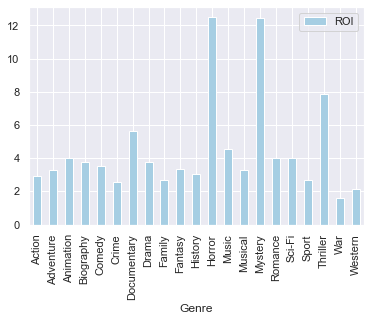

In [506]:
# Plotting Data
ax1 = ROI.plot.bar(x='Genre',
                      y='ROI')

In [515]:
!ls

Complete_CLEAN_IMDB_Data.csv
DataExplorationCont.ipynb
DataInvestigation_Alex.ipynb
FinalCleaning.csv
FinalCleaning.csv_CLEAN
FinalCleaningPro1.csv.gz
FinalCleaningPro1.ipynb
FinalCleaningPro2.csv
FinalCleaning_CLEAN.csv
FinalJupyterNotebook.ipynb
GraphsFinalData.ipynb
InitialDataExploration.ipynb
InitialDataExplorationPatrick-.csv.gz
InitialDataExplorationPatrick-Copy1.ipynb
InitialDataExplorationPatrick.ipynb
Movie-Data-Project1.ipynb
Neptune-Jennifer Cleaning-checkpoint.ipynb
Neptune.ipynb
README.md
Untitled.ipynb
Untitled1.ipynb
Untitled2.ipynb
imdb_title_basics.csv
imdb_title_basics_CLEAN.csv
imdb_title_ratings_df_CLEAN.csv
imdb_titles_w_studio.csv
movie_gross_df_CLEAN.csv
movie_gross_df_CLEAN_UPDATED.csv
tmdb_movies_df_CLEAN UPDATED.csv
tmdb_movies_df_CLEAN.csv
tn_movieDataCleanedPatrick.csv.gz
tn_movieDataCleanedPatrick.ipynb
zippedData


In [519]:
movie_df = pd.read_csv('Complete_CLEAN_IMDB_Data.csv')
movies_w_opening = pd.read_csv('tmdb_movies_df_CLEAN.csv')

In [520]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1163 entries, 0 to 1162
Data columns (total 52 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1163 non-null   int64  
 1   Unnamed: 0_x       1163 non-null   int64  
 2   tconst             1163 non-null   object 
 3   primary_title      1163 non-null   object 
 4   original_title     1163 non-null   object 
 5   start_year         1163 non-null   int64  
 6   runtime_minutes    1163 non-null   float64
 7   genres             1163 non-null   object 
 8   Action             1163 non-null   bool   
 9   Crime              1163 non-null   bool   
 10  Drama              1163 non-null   bool   
 11  Biography          1163 non-null   bool   
 12  Comedy             1163 non-null   bool   
 13  Fantasy            1163 non-null   bool   
 14  Horror             1163 non-null   bool   
 15  Thriller           1163 non-null   bool   
 16  Adventure          1163 

In [521]:
#This isn't necessary for the sucess of the code the extra columns just drive me crazy
col_drop = ['Unnamed: 0','Unnamed: 0_x','start_year_str','Unnamed: 0_y', 'Clean Title','Unnamed: 0_x.1',
           'Unnamed: 0_y.1','Domestic Gross_x','Year_y','nameYear']

movie_df.drop(col_drop, axis = 1, inplace = True)

## Merge just the release date info from TMDB

In [529]:
df = movie_df.merge(movies_w_opening[['release_date','Link']],on='Link')

KeyError: "['release_date'] not in index"

In [527]:
#also unnecessary for the success of the visualization 

keep_cols = ['tconst', 'primary_title' ,'original_title' , 'start_year' , 'runtime_minutes', 'genres', 
             'Year_x', 'Average Rating', 'Number of Votes' , 'Movie' ,'Production Budget', 'Domestic Gross_y',
             'Worldwide Gross' ,'Profit', 'ROI','Studio','Release Date'] 
df = df[keep_cols]

KeyError: "['Release Date'] not in index"